In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume as ipv
import ipywidgets as widgets

In [2]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=15)

In [3]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.nasa_exoplanet_archive import NasaExoplanetArchive
from astropy.io import ascii

In [4]:
## For this to work, you need to install ipympl
%matplotlib widget

In [5]:
transiting_planets = NasaExoplanetArchive.query_criteria(table="exoplanets", where="pl_discmethod like 'Transit'", select="pl_hostname,pl_letter,pl_name,pl_discmethod,ra,dec,st_dist,pl_facility")

In [6]:
ras = transiting_planets['ra']
decs = transiting_planets['dec']
dist = transiting_planets['st_dist']

In [7]:
transiting_planets['xs'] = np.cos(ras) * np.cos(decs) * dist
transiting_planets['ys'] = np.sin(ras) * np.cos(decs) * dist
transiting_planets['zs'] = np.sin(decs) * dist

In [8]:
list(np.unique(transiting_planets['pl_facility']))

['Acton Sky Portal Observatory',
 'Anglo-Australian Telescope',
 'Cerro Tololo Inter-American Observatory',
 'CoRoT',
 'HATNet',
 'HATSouth',
 'Haleakala Observatory',
 'Hubble Space Telescope',
 'K2',
 'KELT',
 'KELT-North',
 'KELT-South',
 'Kepler',
 'La Silla Observatory',
 'MEarth Project',
 'Multiple Facilities',
 'Multiple Observatories',
 'OGLE',
 'Paranal Observatory',
 'Qatar',
 'SuperWASP',
 'SuperWASP-North',
 'SuperWASP-South',
 'TrES',
 'Transiting Exoplanet Survey Satellite (TESS)',
 'United Kingdom Infrared Telescope',
 'WASP-South',
 'XO']

In [9]:
kepler_mask = transiting_planets['pl_facility'] == "Kepler"
k2_mask = transiting_planets['pl_facility'] == "K2"
hat_mask = transiting_planets['pl_facility'] == "HATNet"
hats_mask = transiting_planets['pl_facility'] == "HATSouth"
tess_mask = transiting_planets['pl_facility'] == 'Transiting Exoplanet Survey Satellite (TESS)'
wasp_mask = np.logical_or(transiting_planets['pl_facility'] == 'SuperWASP-North', transiting_planets['pl_facility'] == 'SuperWASP')
wasps_mask = np.logical_or(transiting_planets['pl_facility'] == 'WASP-South', transiting_planets['pl_facility'] == 'SuperWASP-South')

masks = {'Kepler': kepler_mask, 'K2': k2_mask, 'HAT': hat_mask, 'HATSouth': hats_mask, 'TESS': tess_mask, 'WASP': wasp_mask, 'WASP-South': wasps_mask}

# 3D Projection Plot

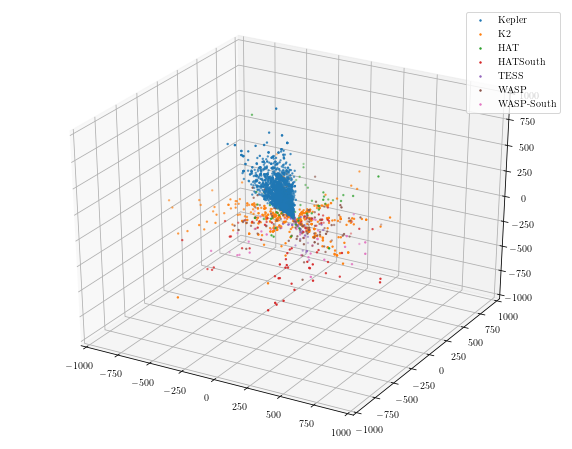

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for mask_label in masks:
    mask = masks[mask_label]
    ax.scatter(transiting_planets['xs'][mask], 
               transiting_planets['ys'][mask], 
               transiting_planets['zs'][mask], s=2, label=mask_label)
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1000, 1000)
ax.set_zlim(-1000, 1000)
ax.legend()
plt.show()

In [11]:
np.array(transiting_planets['xs'][kepler_mask])

array([204.89483157, 204.89483157,  58.98786828, ..., 126.4169275 ,
       161.64565968, 200.57862134])

# ipyvolume plot

In [12]:
fig = ipv.figure()
# we use the coordinates as the normals, and thus direction
color_list = ["red", "blue", "green", "yellow", "purple", "orange","black"]
for i,mask_label in enumerate(masks):
    mask = masks[mask_label]
    ipv.scatter(np.array(transiting_planets['xs'][mask]), np.array(transiting_planets['ys'][mask]), 
                np.array(transiting_planets['zs'][mask]), 
                    #vx=Xs[0:10000], vy=Ys[0:10000], vz=Zs[0:10000], 
                size=1,color=color_list[i],marker="sphere",label=mask_label)
    
ipv.xlabel('x: d(pc)')
ipv.ylabel('y: d(pc)')
ipv.zlabel('z: d(pc)')
#ipv.savefig('transit_planets_ipyvol.svg')
ipv.show()

In [13]:
df_bj = pd.read_csv('/Users/Helios/Desktop/princeton_classes/AST_541/bailerjones_gaia_cols.csv',low_memory=False)
bailer_jones = ascii.read('/Users/Helios/Desktop/princeton_classes/AST_541/bailerjones_gaia_cols.csv')

In [14]:
import astropy.coordinates as coord
import astropy.units as u

ra = np.array(coord.Angle(bailer_jones['_RAJ2000']*u.degree))
#ra = ra.wrap_at(180*u.degree)
dec = np.array(coord.Angle(bailer_jones['_DEJ2000']*u.degree))

In [32]:
ra_sgr,dec_sgr,dist_sgr = 17.761121,-28.992175,8200

In [33]:
Xs = bailer_jones['rest']*np.cos(dec)*np.cos(ra)
Ys = bailer_jones['rest']*np.sin(ra)*np.cos(dec)
Zs = bailer_jones['rest']*np.sin(dec)

In [37]:
x_sgr = dist_sgr*np.cos(dec_sgr)*np.cos(ra_sgr)
y_sgr = dist_sgr*np.sin(dec_sgr)*np.cos(ra_sgr)
z_sgr = dist_sgr*np.sin(dec_sgr)

In [45]:
import ipyvolume.pylab as p3
p3.style.use('dark')
%matplotlib inline
fig = ipv.figure()
# we use the coordinates as the normals, and thus direction
color_list = ["red", "blue", "green", "yellow", "purple", "orange","brown"]
for i,mask_label in enumerate(masks):
    mask = masks[mask_label]
    ipv.scatter(np.array(transiting_planets['xs'][mask]), np.array(transiting_planets['ys'][mask]), 
                np.array(transiting_planets['zs'][mask]), 
                    #vx=Xs[0:10000], vy=Ys[0:10000], vz=Zs[0:10000], 
                size=1,color=color_list[i],marker="sphere",label=mask_label)
s = ipv.scatter(Xs[0:50000], Ys[0:50000], Zs[0:50000], 
                #vx=Xs[0:1000], vy=Ys[0:10000], vz=Zs[0:100000], 
                size=0.1,marker="sphere", color="white")
sgr = ipv.scatter(np.array([x_sgr]), np.array([y_sgr]), np.array([z_sgr]), 
                #vx=Xs[0:1000], vy=Ys[0:10000], vz=Zs[0:100000], 
               size=5,marker="sphere", color="white")

ipv.style.axes_off()
ipv.style.box_off()
ipv.show()